In [ ]:
!pip install opencv-python matplotlib numpy

LINK DO DRIVE COM AS CARTAS: https://drive.google.com/drive/folders/1fTXUnBgwjd3bUtK7i-TcMK4hrqGTYDs0?usp=sharing

Correlação cruzada normalizada: 0.8465


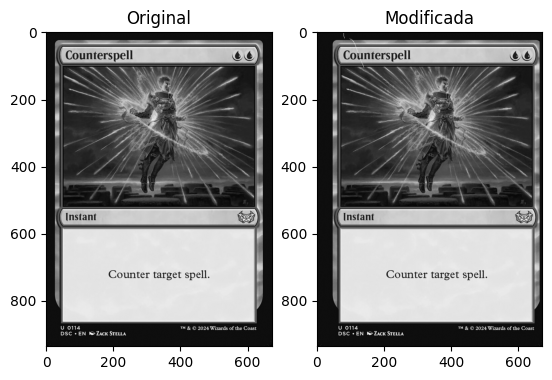

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar imagens em escala de cinza
original = cv2.imread('carta-original.jpg', cv2.IMREAD_GRAYSCALE)
modificada = cv2.imread('carta-modificada.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar se as imagens têm o mesmo tamanho
if original.shape != modificada.shape:
    print("As imagens têm tamanhos diferentes! Redimensionando a modificada.")
    modificada = cv2.resize(modificada, (original.shape[1], original.shape[0]))

# Aplicar correlação cruzada
res = cv2.matchTemplate(modificada, original, cv2.TM_CCOEFF_NORMED)
correlacao = res[0][0]

print(f"Correlação cruzada normalizada: {correlacao:.4f}")

# Visualizar as duas imagens lado a lado
plt.subplot(1,2,1)
plt.imshow(original, cmap='gray')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(modificada, cmap='gray')
plt.title('Modificada')

plt.show()


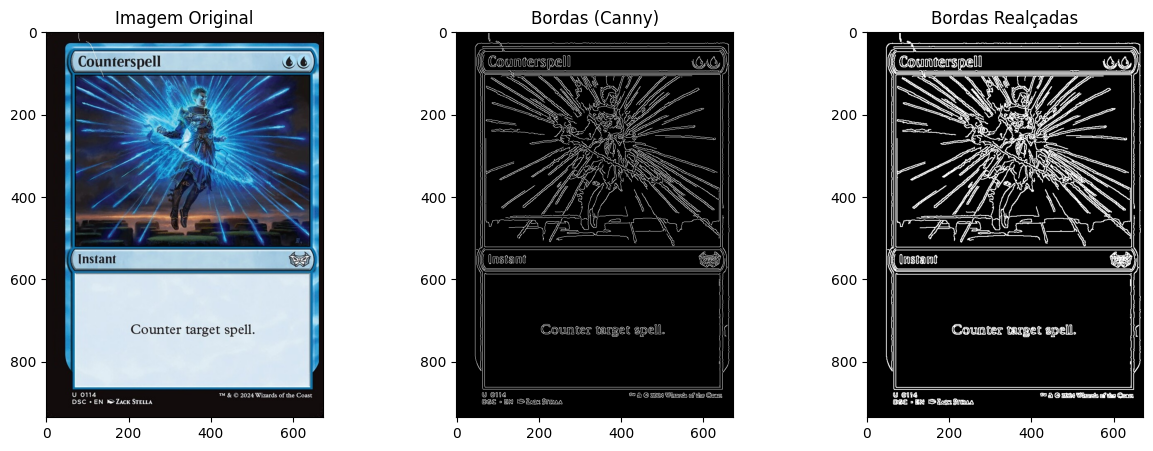

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem (colorida e em escala de cinza)
imagem_colorida = cv2.imread("carta-modificada.jpg")
imagem_cinza = cv2.cvtColor(imagem_colorida, cv2.COLOR_BGR2GRAY)

# Aplicar suavização para reduzir ruído
imagem_suavizada = cv2.GaussianBlur(imagem_cinza, (5, 5), 0)

# Aplicar Canny para detectar bordas (ajuste os thresholds conforme necessário)
bordas = cv2.Canny(imagem_suavizada, threshold1=50, threshold2=150)

# (Opcional) Usar morfologia para realçar as bordas finas
kernel = np.ones((2, 2), np.uint8)
bordas_dilatadas = cv2.dilate(bordas, kernel, iterations=1)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imagem_colorida, cv2.COLOR_BGR2RGB))
plt.title("Imagem Original")

plt.subplot(1, 3, 2)
plt.imshow(bordas, cmap='gray')
plt.title("Bordas (Canny)")

plt.subplot(1, 3, 3)
plt.imshow(bordas_dilatadas, cmap='gray')
plt.title("Bordas Realçadas")

plt.show()


In [ ]:

# Carregar as imagens (original e modificada)
img_original = cv2.imread("fieryfall-original.jpg", cv2.IMREAD_GRAYSCALE)
img_modificada = cv2.imread("fieryfall-scan.jpg", cv2.IMREAD_GRAYSCALE)

# Garantir que ambas tenham o mesmo tamanho
if img_original.shape != img_modificada.shape:
    img_modificada = cv2.resize(img_modificada, (img_original.shape[1], img_original.shape[0]))

# Suavizar ambas as imagens
blur_orig = cv2.GaussianBlur(img_original, (5, 5), 0)
blur_mod = cv2.GaussianBlur(img_modificada, (5, 5), 0)

# Aplicar Canny nas duas
edges_orig = cv2.Canny(blur_orig, 50, 150)
edges_mod = cv2.Canny(blur_mod, 50, 150)

# Subtrair as bordas: bordas novas = modificada - original
bordas_novas = cv2.subtract(edges_mod, edges_orig)

# Aplicar uma dilatação para destacar linhas finas
kernel = np.ones((2, 2), np.uint8)
bordas_novas_dilatadas = cv2.dilate(bordas_novas, kernel, iterations=1)

# (Opcional) sobrepor os riscos detectados na imagem modificada
img_color = cv2.cvtColor(img_modificada, cv2.COLOR_GRAY2BGR)
img_color[bordas_novas_dilatadas > 0] = [0, 0, 255]  # riscos em vermelho

# Mostrar tudo
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.imshow(edges_mod, cmap='gray')
plt.title("Bordas (Carta Modificada)")

plt.subplot(1, 3, 2)
plt.imshow(bordas_novas, cmap='gray')
plt.title("Diferença de Bordas (Riscos)")

plt.subplot(1, 3, 3)
plt.imshow(img_color)
plt.title("Riscos Destacados em Vermelho")

plt.tight_layout()
plt.show()


AttributeError: 'NoneType' object has no attribute 'shape'

TENTATIVA DE TIRAR "SALT AND PEPPER" COM EROSÃO E DILATAÇÃO

In [ ]:
# Carregar imagens em escala de cinza
img_original = cv2.imread("fieryfall-original.jpg", cv2.IMREAD_GRAYSCALE)
img_modificada = cv2.imread("fieryfall-foto.jpg", cv2.IMREAD_GRAYSCALE)

# Garantir que a modificada tenha o mesmo tamanho da original
if img_original.shape != img_modificada.shape:
    img_modificada = cv2.resize(img_modificada, (img_original.shape[1], img_original.shape[0]))

# -------- 1. CORRELAÇÃO CRUZADA PARA ALINHAMENTO --------
# matchTemplate precisa que a imagem base seja maior ou igual à template, então usamos borda
template = img_original
base = cv2.copyMakeBorder(img_modificada, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=0)

# Correlation
res = cv2.matchTemplate(base, template, cv2.TM_CCOEFF_NORMED)
_, _, _, max_loc = cv2.minMaxLoc(res)
top_left = max_loc

# Calcular deslocamento (dx, dy)
dx = top_left[0] - 50
dy = top_left[1] - 50
print(f"Deslocamento estimado: dx={dx}, dy={dy}")

# -------- 2. REALINHAR A MODIFICADA --------
# Criar matriz de transformação (translação)
M = np.float32([[1, 0, -dx], [0, 1, -dy]])
img_mod_alinhada = cv2.warpAffine(img_modificada, M, (img_original.shape[1], img_original.shape[0]))

# -------- 3. DETECÇÃO DE RISCOS (bordas novas) --------
# Suavização
blur_orig = cv2.GaussianBlur(img_original, (5, 5), 0)
blur_mod = cv2.GaussianBlur(img_mod_alinhada, (5, 5), 0)

# Canny
edges_orig = cv2.Canny(blur_orig, 50, 150)
edges_mod = cv2.Canny(blur_mod, 50, 150)

# Diferença
bordas_novas = cv2.subtract(edges_mod, edges_orig)

# Realce
kernel = np.ones((2, 2), np.uint8)
bordas_novas_dilatadas = cv2.dilate(bordas_novas, kernel, iterations=1)

# Sobrepor riscos na imagem alinhada
img_color = cv2.cvtColor(img_mod_alinhada, cv2.COLOR_GRAY2BGR)
img_color[bordas_novas_dilatadas > 0] = [0, 0, 255]  # vermelho

# -------- 4. VISUALIZAÇÃO --------
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.imshow(edges_mod, cmap='gray')
plt.title("Bordas (Modificada Alinhada)")

plt.subplot(1, 3, 2)
plt.imshow(bordas_novas, cmap='gray')
plt.title("Bordas Novas (Riscos)")

plt.subplot(1, 3, 3)
plt.imshow(img_color)
plt.title("Riscos Detectados (Vermelho)")

plt.tight_layout()
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

TENTATIVA DE TIRAR O "SALT AND PPER" COM COMBINAÇÕES MORFOLOGICAS


Deslocamento estimado: dx=0, dy=0


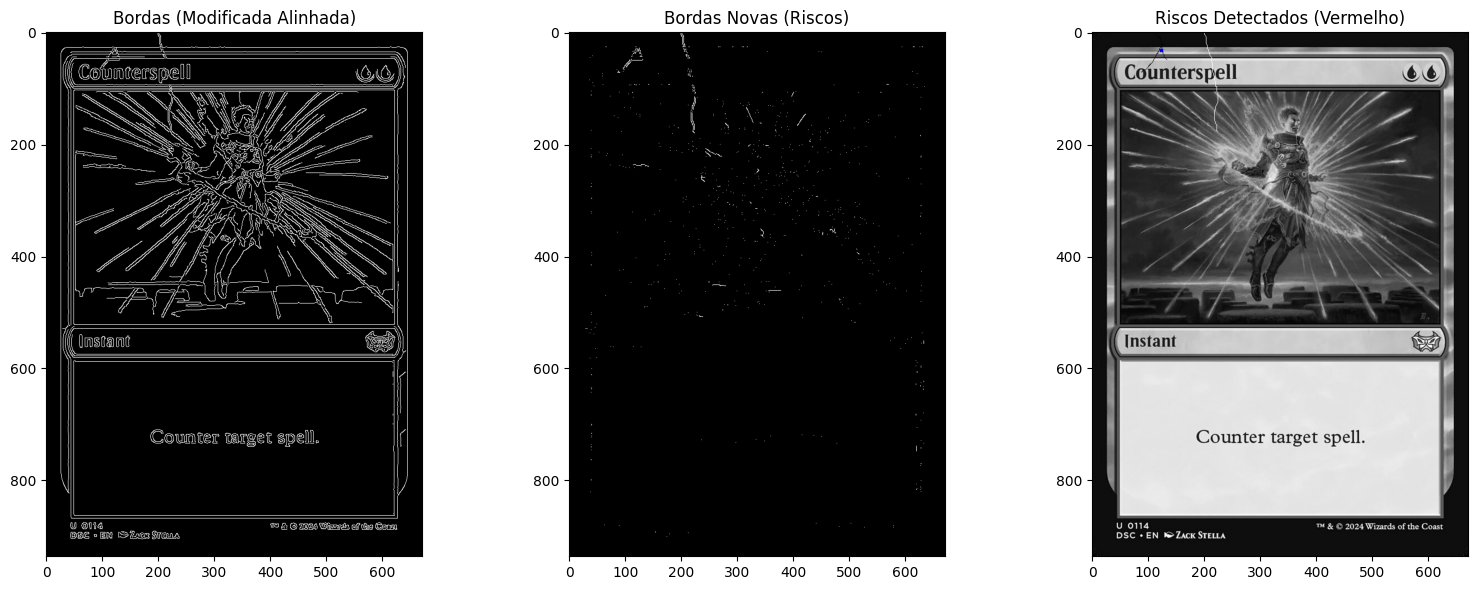

In [ ]:
# Carregar imagens em escala de cinza
img_original = cv2.imread("carta-original.jpg", cv2.IMREAD_GRAYSCALE)
img_modificada = cv2.imread("carta-modificada2.jpg", cv2.IMREAD_GRAYSCALE)

# Garantir que a modificada tenha o mesmo tamanho da original
if img_original.shape != img_modificada.shape:
    img_modificada = cv2.resize(img_modificada, (img_original.shape[1], img_original.shape[0]))

# -------- 1. CORRELAÇÃO CRUZADA PARA ALINHAMENTO --------
# matchTemplate precisa que a imagem base seja maior ou igual à template, então usamos borda
template = img_original
base = cv2.copyMakeBorder(img_modificada, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=0)

# Correlation
res = cv2.matchTemplate(base, template, cv2.TM_CCOEFF_NORMED)
_, _, _, max_loc = cv2.minMaxLoc(res)
top_left = max_loc

# Calcular deslocamento (dx, dy)
dx = top_left[0] - 50
dy = top_left[1] - 50
print(f"Deslocamento estimado: dx={dx}, dy={dy}")

# -------- 2. REALINHAR A MODIFICADA --------
# Criar matriz de transformação (translação)
M = np.float32([[1, 0, -dx], [0, 1, -dy]])
img_mod_alinhada = cv2.warpAffine(img_modificada, M, (img_original.shape[1], img_original.shape[0]))

# -------- 3. DETECÇÃO DE RISCOS (bordas novas) --------
# Suavização
blur_orig = cv2.GaussianBlur(img_original, (5, 5), 0)
blur_mod = cv2.GaussianBlur(img_mod_alinhada, (5, 5), 0)

# Canny
edges_orig = cv2.Canny(blur_orig, 50, 150)
edges_mod = cv2.Canny(blur_mod, 50, 150)

# Diferença
bordas_novas = cv2.subtract(edges_mod, edges_orig)

# Realce
kernel = np.ones((2, 2), np.uint8)
bordas_novas_dilatadas = cv2.dilate(bordas_novas, kernel, iterations=1)

# -------- MORFOLOGIA PARA LIMPAR RUIDO --------
# Kernel um pouco maior ajuda a limpar bem o ruído
kernel = np.ones((5, 5), np.uint8)

# 1. Remover ruído (abrir: erosão seguida de dilatação)
bordas_morf = cv2.morphologyEx(bordas_novas_dilatadas, cv2.MORPH_OPEN, kernel)

# 2. Preencher falhas (fechar: dilatação seguida de erosão)
bordas_morf = cv2.morphologyEx(bordas_morf, cv2.MORPH_CLOSE, kernel)

# Criar imagem colorida a partir da modificada alinhada
img_color = cv2.cvtColor(img_mod_alinhada, cv2.COLOR_GRAY2BGR)

# Marcar riscos em vermelho
img_color[bordas_morf > 0] = [0, 0, 255]  # vermelho


# -------- 4. VISUALIZAÇÃO --------
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.imshow(edges_mod, cmap='gray')
plt.title("Bordas (Modificada Alinhada)")

plt.subplot(1, 3, 2)
plt.imshow(bordas_novas, cmap='gray')
plt.title("Bordas Novas (Riscos)")

plt.subplot(1, 3, 3)
plt.imshow(img_color)
plt.title("Riscos Detectados (Vermelho)")

plt.tight_layout()
plt.show()


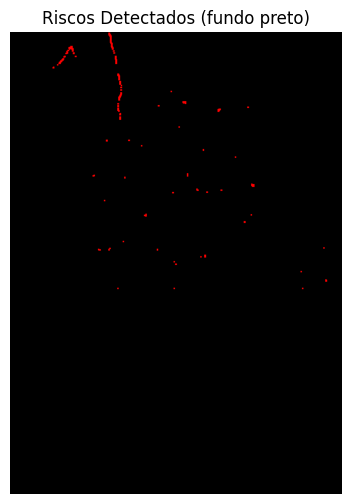

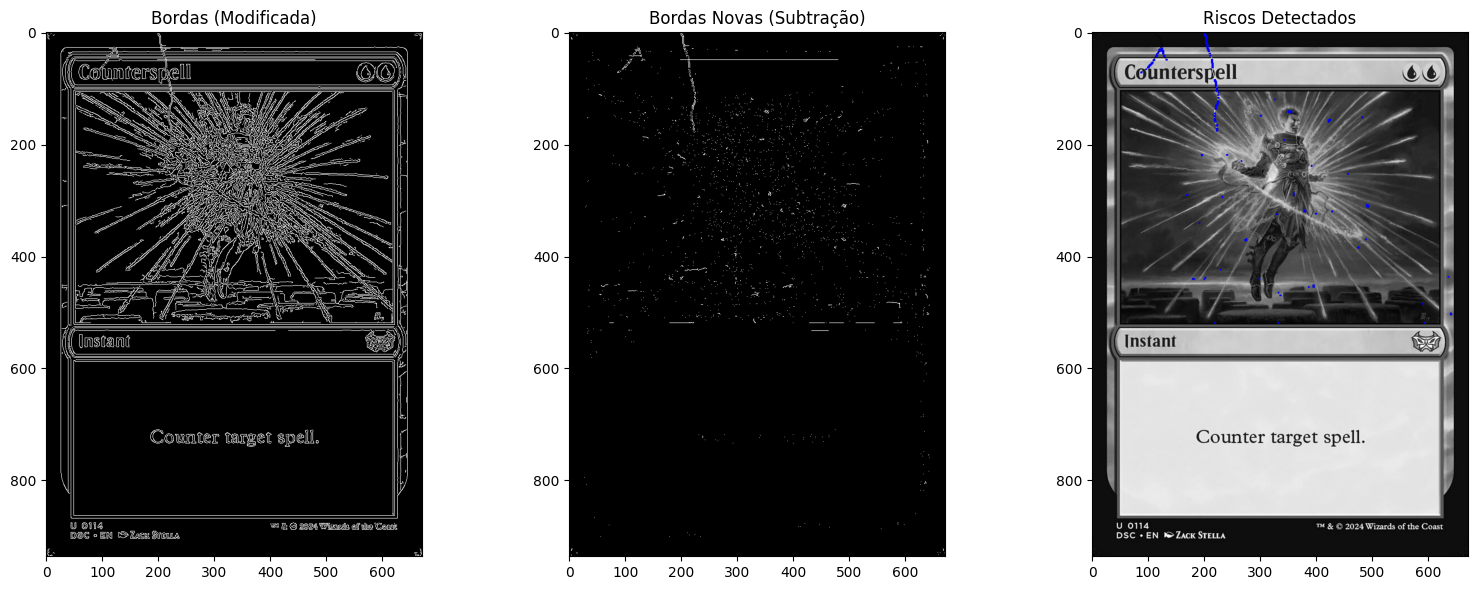

In [ ]:
# Carregar imagens em escala de cinza
img_original = cv2.imread("/content/carta-original.jpg", cv2.IMREAD_GRAYSCALE)
img_modificada = cv2.imread("/content/carta-modificada2.jpg", cv2.IMREAD_GRAYSCALE)

# Garantir que a modificada tenha o mesmo tamanho da original
if img_original.shape != img_modificada.shape:
    img_modificada = cv2.resize(img_modificada, (img_original.shape[1], img_original.shape[0]))

# -------- 1. CORRELAÇÃO CRUZADA PARA ALINHAMENTO --------
template = img_original
base = cv2.copyMakeBorder(img_modificada, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=0)
res = cv2.matchTemplate(base, template, cv2.TM_CCOEFF_NORMED)
_, _, _, max_loc = cv2.minMaxLoc(res)
dx = max_loc[0] - 50
dy = max_loc[1] - 50

# Realinhar a modificada
M = np.float32([[1, 0, -dx], [0, 1, -dy]])
img_mod_alinhada = cv2.warpAffine(img_modificada, M, (img_original.shape[1], img_original.shape[0]))

# -------- 2. DETECÇÃO DE BORDAS E DIFERENÇA --------
# Aplicar Canny diretamente sem suavização pesada
edges_orig = cv2.Canny(img_original, 30, 100)
edges_mod = cv2.Canny(img_mod_alinhada, 30, 100)

# Subtrair bordas
bordas_novas = cv2.subtract(edges_mod, edges_orig)

# -------- 3. PROCESSAMENTO MORFOLÓGICO --------
# Dilatar para reforçar traços finos
kernel = np.ones((2, 2), np.uint8)
dilatada = cv2.dilate(bordas_novas, kernel, iterations=1)

# Aplicar abertura (remoção de ruído fino)
kernel_maior = np.ones((3, 3), np.uint8)
limpa = cv2.morphologyEx(dilatada, cv2.MORPH_OPEN, kernel_maior)

# -------- 4. SOBREPOR E EXIBIR RESULTADO --------
# Converter imagem modificada para BGR
img_color = cv2.cvtColor(img_mod_alinhada, cv2.COLOR_GRAY2BGR)
img_color[limpa > 0] = [0, 0, 255]  # marcar em vermelho

# -------- IMAGEM COM FUNDO PRETO E RISCOS EM VERMELHO --------
# Criar imagem preta
riscos_em_preto = np.zeros((img_original.shape[0], img_original.shape[1], 3), dtype=np.uint8)

# Colorir apenas os pixels com riscos
riscos_em_preto[limpa > 0] = [0, 0, 255]  # vermelho (BGR)

# Exibir a imagem
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(riscos_em_preto, cv2.COLOR_BGR2RGB))
plt.title("Riscos Detectados (fundo preto)")
plt.axis("off")
plt.show()

# Opcional: salvar a imagem
cv2.imwrite("/mnt/data/riscos_detectados.png", riscos_em_preto)

# Plotagem
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.imshow(edges_mod, cmap='gray')
plt.title("Bordas (Modificada)")

plt.subplot(1, 3, 2)
plt.imshow(bordas_novas, cmap='gray')
plt.title("Bordas Novas (Subtração)")

plt.subplot(1, 3, 3)
plt.imshow(img_color)
plt.title("Riscos Detectados")

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def analisar_carta(original_path, modificada_path):
    """
    Função que:
    - Carrega as imagens.
    - Recorta automaticamente a carta da imagem modificada.
    - Alinha usando correlação cruzada.
    - Exibe deslocamento, distância e centros.
    - Detecta riscos.
    """

    # -------- 1. Carregar imagens --------
    img_original = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
    img_modificada = cv2.imread(modificada_path, cv2.IMREAD_GRAYSCALE)

    # -------- 2. Recorte automático da carta na modificada --------
    def recortar_carta(img):
        # Desfoque para reduzir ruído
        blur = cv2.GaussianBlur(img, (5, 5), 0)
        # Limiar adaptativo
        _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        # Inverter: carta clara, fundo escuro
        thresh = cv2.bitwise_not(thresh)
        # Encontrar contornos
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            # Maior contorno = carta
            cnt = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(cnt)
            return img[y:y+h, x:x+w]
        else:
            print("⚠️ Não foi possível detectar a carta na imagem modificada.")
            return img

    img_mod_recortada = recortar_carta(img_modificada)

    # -------- 3. Redimensionar modificada para tamanho da original --------
    img_mod_redim = cv2.resize(img_mod_recortada, (img_original.shape[1], img_original.shape[0]))

    # -------- 4. Correlação cruzada para alinhamento --------
    template = img_original
    base = cv2.copyMakeBorder(img_mod_redim, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=0)
    res = cv2.matchTemplate(base, template, cv2.TM_CCOEFF_NORMED)
    _, _, _, max_loc = cv2.minMaxLoc(res)
    dx = max_loc[0] - 50
    dy = max_loc[1] - 50

    # Realinhar
    M = np.float32([[1, 0, -dx], [0, 1, -dy]])
    img_mod_alinhada = cv2.warpAffine(img_mod_redim, M, (img_original.shape[1], img_original.shape[0]))

    # -------- 5. Cálculo dos centros e distância euclidiana --------
    h, w = img_original.shape
    centro_original = (w // 2, h // 2)
    centro_modificado = (centro_original[0] + dx, centro_original[1] + dy)
    distancia = euclidean(centro_original, centro_modificado)

    print(f"Deslocamento dx: {dx}, dy: {dy}")
    print(f"Distância euclidiana entre centros: {distancia:.2f} pixels")

    # -------- 6. Imagem com centros marcados --------
    img_centros = cv2.cvtColor(img_mod_alinhada.copy(), cv2.COLOR_GRAY2BGR)
    cv2.circle(img_centros, centro_original, 5, (0, 255, 0), -1)  # Verde: original
    cv2.circle(img_centros, centro_modificado, 5, (0, 0, 255), -1)  # Vermelho: modificado

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img_centros, cv2.COLOR_BGR2RGB))
    plt.title("Centros (Verde: Original, Vermelho: Modificado)")
    plt.axis("off")
    plt.show()

    # -------- 7. Detecção de bordas e riscos --------
    edges_orig = cv2.Canny(img_original, 30, 100)
    edges_mod = cv2.Canny(img_mod_alinhada, 30, 100)
    bordas_novas = cv2.subtract(edges_mod, edges_orig)

    # Processamento morfológico
    kernel = np.ones((2, 2), np.uint8)
    dilatada = cv2.dilate(bordas_novas, kernel, iterations=1)
    kernel_maior = np.ones((3, 3), np.uint8)
    limpa = cv2.morphologyEx(dilatada, cv2.MORPH_OPEN, kernel_maior)

    # Imagem com riscos em fundo preto
    riscos_em_preto = np.zeros((img_original.shape[0], img_original.shape[1], 3), dtype=np.uint8)
    riscos_em_preto[limpa > 0] = [0, 0, 255]

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(riscos_em_preto, cv2.COLOR_BGR2RGB))
    plt.title("Riscos Detectados (fundo preto)")
    plt.axis("off")
    plt.show()

    # -------- 8. Plotagem comparativa --------
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(edges_mod, cmap='gray')
    plt.title("Bordas (Modificada)")

    plt.subplot(1, 3, 2)
    plt.imshow(bordas_novas, cmap='gray')
    plt.title("Bordas Novas (Subtração)")

    img_color = cv2.cvtColor(img_mod_alinhada, cv2.COLOR_GRAY2BGR)
    img_color[limpa > 0] = [0, 0, 255]

    plt.subplot(1, 3, 3)
    plt.imshow(img_color)
    plt.title("Riscos Detectados")

    plt.tight_layout()
    plt.show()


Deslocamento dx: 2, dy: 1
Distância euclidiana entre centros: 2.24 pixels


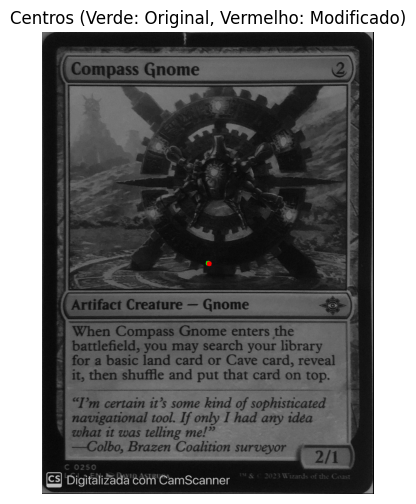

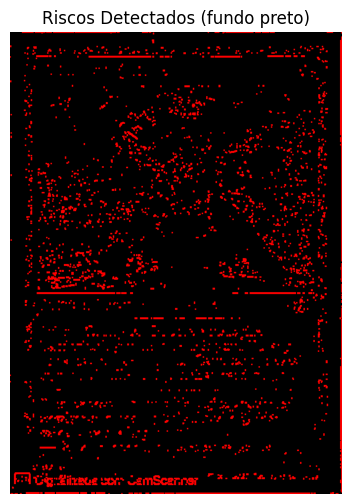

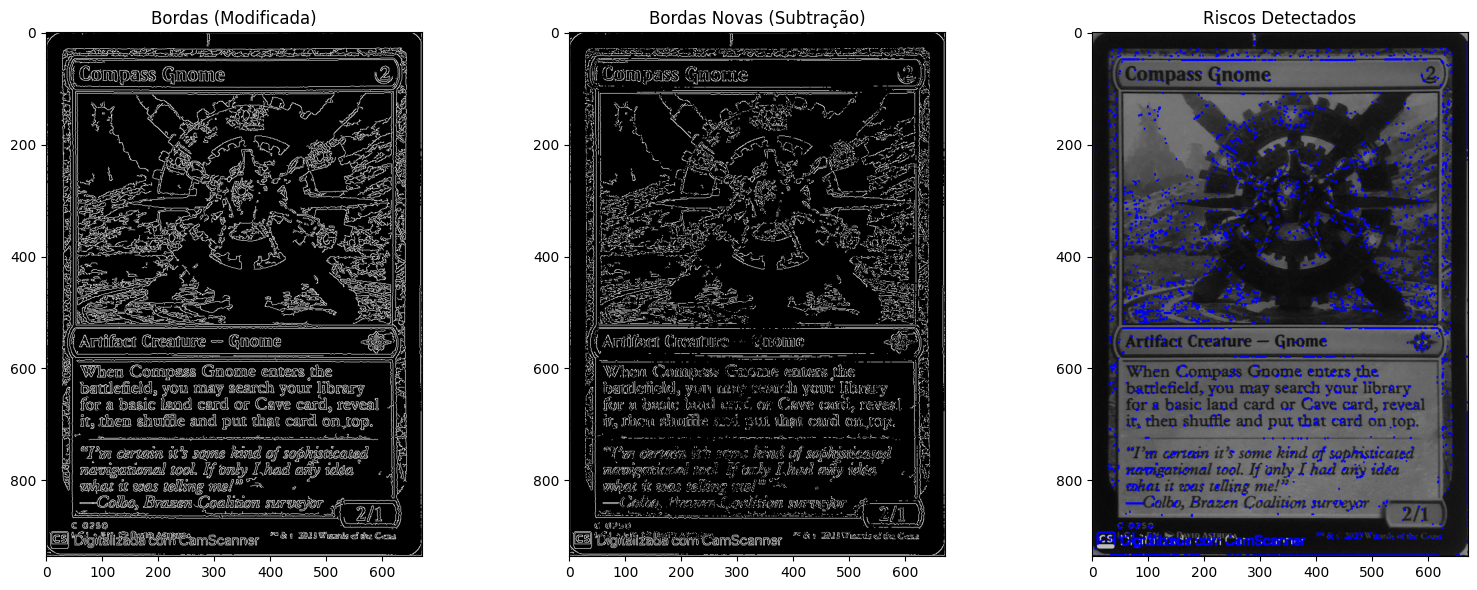

In [ ]:
analisar_carta("/content/carta1_og.jpg", "/content/carta1_broken.jpg")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def atribuir_nota_psa(distancia, area_riscos):
    if distancia < 1:
        score_centro = 10
    elif distancia < 2:
        score_centro = 9
    elif distancia < 3.5:
        score_centro = 8
    elif distancia < 5.5:
        score_centro = 7
    elif distancia < 7:
        score_centro = 6
    elif distancia < 8.5:
        score_centro = 5
    elif distancia < 9.5:
        score_centro = 4
    elif distancia < 8.5:
        score_centro = 3
    elif distancia < 10:
        score_centro = 2
    else:
        score_centro = 1

    if area_riscos == 0:
        score_risco = 10
    elif area_riscos < 100:
        score_risco = 9
    elif area_riscos < 300:
        score_risco = 8
    elif area_riscos < 800:
        score_risco = 7
    elif area_riscos < 2000:
        score_risco = 6
    elif area_riscos < 5000:
        score_risco = 5
    else:
        score_risco = 3

    nota_final = round((0.6 * score_centro + 0.4 * score_risco))
    return nota_final, score_centro, score_risco

def analisar_carta(original_path, modificada_path):
    img_original = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
    img_modificada = cv2.imread(modificada_path, cv2.IMREAD_GRAYSCALE)

    def recortar_carta(img):
        blur = cv2.GaussianBlur(img, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        thresh = cv2.bitwise_not(thresh)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            cnt = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(cnt)
            return img[y:y+h, x:x+w]
        else:
            print("⚠️ Não foi possível detectar a carta na imagem modificada.")
            return img

    img_mod_recortada = recortar_carta(img_modificada)
    img_mod_redim = cv2.resize(img_mod_recortada, (img_original.shape[1], img_original.shape[0]))

    template = img_original
    base = cv2.copyMakeBorder(img_mod_redim, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=0)
    res = cv2.matchTemplate(base, template, cv2.TM_CCOEFF_NORMED)
    _, _, _, max_loc = cv2.minMaxLoc(res)
    dx = max_loc[0] - 50
    dy = max_loc[1] - 50

    M = np.float32([[1, 0, -dx], [0, 1, -dy]])
    img_mod_alinhada = cv2.warpAffine(img_mod_redim, M, (img_original.shape[1], img_original.shape[0]))

    h, w = img_original.shape
    centro_original = (w // 2, h // 2)
    centro_modificado = (centro_original[0] + dx, centro_original[1] + dy)
    distancia = euclidean(centro_original, centro_modificado)

    print(f"Deslocamento dx: {dx}, dy: {dy}")
    print(f"Distância euclidiana entre centros: {distancia:.2f} pixels")

    # -------- Detecção rigorosa de riscos --------
    blur_original = cv2.GaussianBlur(img_original, (3, 3), 0)
    blur_modificada = cv2.GaussianBlur(img_mod_alinhada, (3, 3), 0)

    diff = cv2.absdiff(blur_modificada, blur_original)
    thresh = cv2.adaptiveThreshold(diff, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY, 11, 5)
    kernel = np.ones((2, 2), np.uint8)
    abertura = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    edges = cv2.Canny(abertura, 80, 150)
    riscos = cv2.dilate(edges, np.ones((2, 2), np.uint8), iterations=1)
    area_riscos = np.sum(riscos > 0)

    riscos_color = np.zeros((img_original.shape[0], img_original.shape[1], 3), dtype=np.uint8)
    riscos_color[riscos > 0] = [0, 0, 255]

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(riscos_color, cv2.COLOR_BGR2RGB))
    plt.title("Riscos Detectados (fundo preto)")
    plt.axis("off")
    plt.show()

    # -------- Nota --------
    nota, nota_centro, nota_risco = atribuir_nota_psa(distancia, area_riscos)
    print(f"\n📋 Notas parciais:")
    print(f"• Centramento: {nota_centro}/10")
    print(f"• Superfície: {nota_risco}/10")
    print(f"\n🎯 Nota final estimada (estilo PSA): {nota}/10")
    return nota, nota_centro, nota_risco, area_riscos, distancia



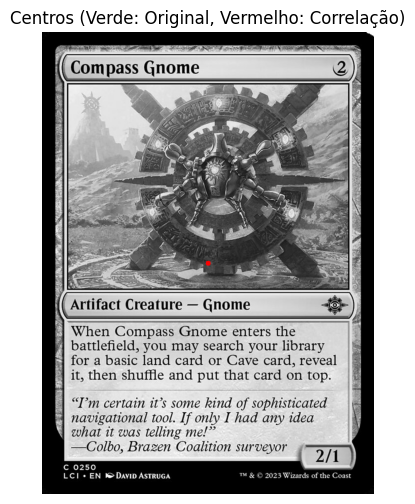

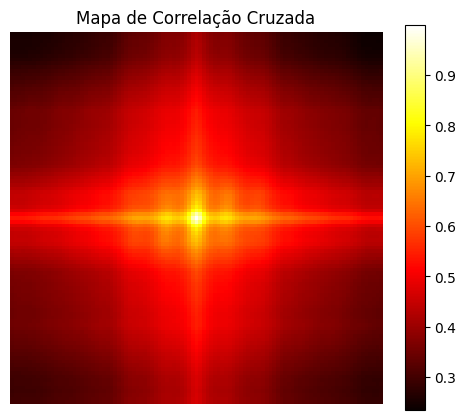

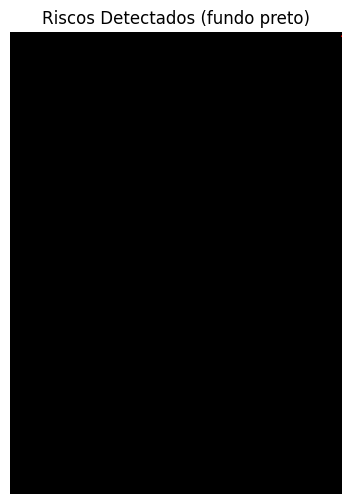

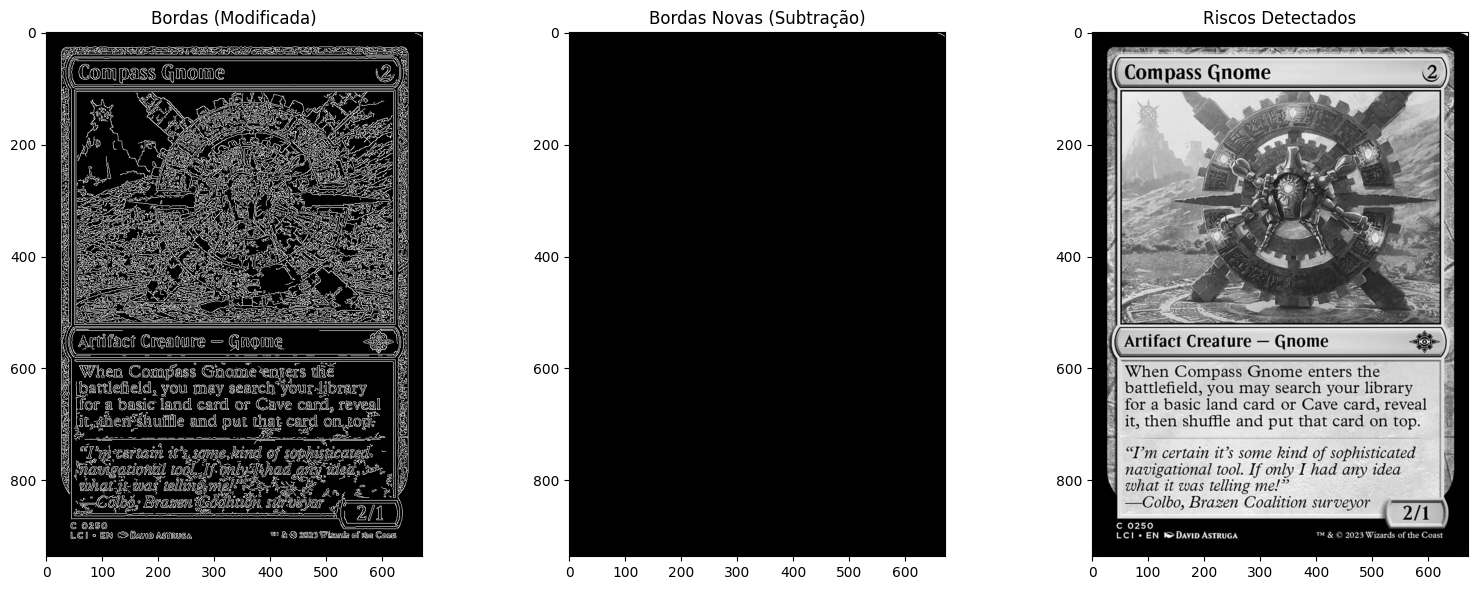


📋 Notas parciais:
• Centramento (correlação): 10/10
• Superfície (riscos): 9/10

🎯 Nota final estimada (estilo PSA): 10/10


{'nota_final': 10,
 'nota_centro': 10,
 'nota_risco': 9,
 'distancia_centros': np.float64(0.0),
 'area_riscos': np.int64(6)}

In [ ]:
analisar_carta("/content/carta1_og2.jpg","/content/carta1_destruida1.jpg")

In [ ]:
# Recarregar as bibliotecas e reexecutar a função após o reset do ambiente

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def atribuir_nota_psa(distancia, area_riscos):
    if distancia < 1:
        score_centro = 10
    elif distancia < 2:
        score_centro = 9
    elif distancia < 3.5:
        score_centro = 8
    elif distancia < 5.5:
        score_centro = 7
    elif distancia < 7:
        score_centro = 6
    elif distancia < 8.5:
        score_centro = 5
    elif distancia < 9.5:
        score_centro = 4
    elif distancia < 8.5:
        score_centro = 3
    elif distancia < 10:
        score_centro = 2
    else:
        score_centro = 1

    if area_riscos == 0:
        score_risco = 10
    elif area_riscos < 100:
        score_risco = 9
    elif area_riscos < 300:
        score_risco = 8
    elif area_riscos < 800:
        score_risco = 7
    elif area_riscos < 2000:
        score_risco = 6
    elif area_riscos < 5000:
        score_risco = 5
    else:
        score_risco = 3

    nota_final = round((0.6 * score_centro + 0.4 * score_risco))
    return nota_final, score_centro, score_risco


def analisar_carta(original_path, modificada_path):
    img_original = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
    img_modificada = cv2.imread(modificada_path, cv2.IMREAD_GRAYSCALE)

    def recortar_carta(img):
        blur = cv2.GaussianBlur(img, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        thresh = cv2.bitwise_not(thresh)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            cnt = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(cnt)
            return img[y:y+h, x:x+w]
        else:
            print("⚠️ Não foi possível detectar a carta na imagem modificada.")
            return img

    img_mod_recortada = recortar_carta(img_modificada)
    img_mod_redim = cv2.resize(img_mod_recortada, (img_original.shape[1], img_original.shape[0]))

    template = img_original
    base = cv2.copyMakeBorder(img_mod_redim, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=0)
    res = cv2.matchTemplate(base, template, cv2.TM_CCOEFF_NORMED)
    _, _, _, max_loc = cv2.minMaxLoc(res)
    dx = max_loc[0] - 50
    dy = max_loc[1] - 50

    M = np.float32([[1, 0, -dx], [0, 1, -dy]])
    img_mod_alinhada = cv2.warpAffine(img_mod_redim, M, (img_original.shape[1], img_original.shape[0]))

    h, w = img_original.shape
    centro_original = (w // 2, h // 2)

    centro_correlacao = (max_loc[0] + template.shape[1] // 2 - 50,
                         max_loc[1] + template.shape[0] // 2 - 50)

    distancia = euclidean(centro_original, centro_correlacao)

    img_centros = cv2.cvtColor(img_mod_alinhada.copy(), cv2.COLOR_GRAY2BGR)
    cv2.circle(img_centros, centro_original, 5, (0, 255, 0), -1)
    cv2.circle(img_centros, centro_correlacao, 5, (0, 0, 255), -1)

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img_centros, cv2.COLOR_BGR2RGB))
    plt.title("Centros (Verde: Original, Vermelho: Correlação)")
    plt.axis("off")
    plt.show()

    plt.figure(figsize=(6, 5))
    plt.imshow(res, cmap='hot')
    plt.colorbar()
    plt.title("Mapa de Correlação Cruzada")
    plt.axis("off")
    plt.show()

    edges_orig = cv2.Canny(img_original, 30, 100)
    edges_mod = cv2.Canny(img_mod_alinhada, 30, 100)
    bordas_novas = cv2.subtract(edges_mod, edges_orig)

    kernel = np.ones((2, 2), np.uint8)
    dilatada = cv2.dilate(bordas_novas, kernel, iterations=1)
    kernel_maior = np.ones((3, 3), np.uint8)
    limpa = cv2.morphologyEx(dilatada, cv2.MORPH_OPEN, kernel_maior)

    riscos_em_preto = np.zeros((img_original.shape[0], img_original.shape[1], 3), dtype=np.uint8)
    riscos_em_preto[limpa > 0] = [0, 0, 255]

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(riscos_em_preto, cv2.COLOR_BGR2RGB))
    plt.title("Riscos Detectados (fundo preto)")
    plt.axis("off")
    plt.show()

    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(edges_mod, cmap='gray')
    plt.title("Bordas (Modificada)")

    plt.subplot(1, 3, 2)
    plt.imshow(bordas_novas, cmap='gray')
    plt.title("Bordas Novas (Subtração)")

    img_color = cv2.cvtColor(img_mod_alinhada, cv2.COLOR_GRAY2BGR)
    img_color[limpa > 0] = [0, 0, 255]

    plt.subplot(1, 3, 3)
    plt.imshow(img_color)
    plt.title("Riscos Detectados")

    plt.tight_layout()
    plt.show()

    area_riscos = np.sum(limpa > 0)
    nota, nota_centro, nota_risco = atribuir_nota_psa(distancia, area_riscos)

    print(f"\n📋 Notas parciais:")
    print(f"• Centramento (correlação): {nota_centro}/10")
    print(f"• Superfície (riscos): {nota_risco}/10")
    print(f"\n🎯 Nota final estimada (estilo PSA): {nota}/10")

    return {
        "nota_final": nota,
        "nota_centro": nota_centro,
        "nota_risco": nota_risco,
        "distancia_centros": distancia,
        "area_riscos": area_riscos
    }

